# 財報分析指標

* 營業毛利 = 營業收入 - 營業成本
* 毛利率(Profit margin) = 營業毛利 / 營業收入 x 100%
* 營業利益 = 營業毛利 - 營業費用
* 營業利益率(營益率、Operating Margin)：營業利益 / 營業收入 x 100%
* 稅前純益 = 營業利益 + 業外收支
* 純益率(Pre-Tax Income Margin) = 稅前純益 / 營業收入 x 100%

In [51]:
import sqlite3, os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
conn = sqlite3.connect(os.path.join('data', 'fs.db'))

In [47]:
sid = input('請輸入股票代碼：')

query = "select * from income where sid="+sid
df = pd.read_sql(query, conn, index_col=['sid','year','season'])

if not len(df):
    print('無此股票資料！')
else:
    print('資料已讀取！')

請輸入股票代碼：2480
資料已讀取！


In [50]:
df['營業毛利'] = df['營業收入合計'] - df['營業成本合計']
df['營業利益'] = df['營業毛利'] - df['營業費用合計']
df['稅前純益'] = df['營業利益'] + df['營業外收入及支出合計']
df['毛利率'] = round(df['營業毛利'] / df['營業收入合計'] * 100, 2)
df['營益率'] = round(df['營業利益'] / df['營業收入合計'] * 100, 2)
df['純益率'] = round(df['稅前純益'] / df['營業收入合計'] * 100, 2)

df.head(10)

不動產重估增值 不重分類至損益之其他項目  不重分類至損益之項目： 停業單位損益合計 停業單位淨利（淨損）  \
sid  year season                                                         
2480 104  01        None         None          NaN     None       None   
          02        None         None          NaN     None       None   
          03        None         None          NaN     None       None   
          04        None         None          NaN     None       None   
     105  01        None         None          NaN     None       None   
          02        None         None          NaN     None       None   
          03        None         None          NaN     None       None   
          04        None         None          NaN     None       None   
     106  01        None         None          NaN     None       None   
          02        None         None          NaN     None       None   

                 停業單位稅後損益  備供出售金融資產未實現評價損益 共同控制下前手權益（淨利∕損） 共同控制下前手權益（淨利／損）  \
sid  year season                                                             
2480 104  01         None          18473.0            None            None   
          02         None           3968.0            None            None   
          03         None         -32520.0            None            None   
          04         None           6024.0            None            None   
     105  01         None          -9356.0            None            None   
          02         None         -11505.0            None            None   
          03         None         -24303.0            None            None   
          04         None         -44032.0            None            None   
     106  01         None          12956.0            None            None   
          02         None           -524.0            None            None   

                 共同控制下前手權益（綜合損益）  ...  非控制權益（淨利∕損）  非控制權益（淨利／損）  非控制權益（綜合損益）  \
sid  year season                  ...                                          
2480 104  01                None  ...          NaN          0.0          0.0   
          02                None  ...          NaN          0.0          NaN   
          03                None  ...          NaN          0.0          0.0   
          04                None  ...          NaN          0.0          0.0   
     105  01                None  ...          NaN          0.0          0.0   
          02                None  ...          NaN          0.0          NaN   
          03                None  ...          NaN          0.0          0.0   
          04                None  ...          NaN          0.0          0.0   
     106  01                None  ...          0.0          NaN          0.0   
          02                None  ...          0.0          NaN          NaN   

                 預期信用減損損失（利益）       營業毛利      營業利益      稅前純益    毛利率   營益率  \
sid  year season                                                            
2480 104  01              NaN   258121.0   69901.0   74223.0  24.31  6.58   
          02              NaN   268544.0   67106.0   71868.0  24.95  6.24   
          03              NaN   311458.0   79436.0   92261.0  25.09  6.40   
          04              NaN  1114157.0  298382.0  330060.0  25.30  6.78   
     105  01              NaN   255133.0   72284.0   76297.0  26.14  7.40   
          02              NaN   271427.0   80378.0   88483.0  29.83  8.83   
          03              NaN   271652.0   93069.0  107070.0  24.80  8.50   
          04              NaN  1103872.0  325296.0  355150.0  26.14  7.70   
     106  01              NaN   253531.0   87258.0   86668.0  23.48  8.08   
          02              NaN   264225.0   88659.0   92820.0  27.75  9.31   

                   純益率  
sid  year season        
2480 104  01      6.99  
          02      6.68  
          03      7.43  
          04      7.50  
     105  01      7.82  
          02      9.73  
          03      9.77  
          04      8.41  
     106  01      8.03  
          02      9.75  

[10 

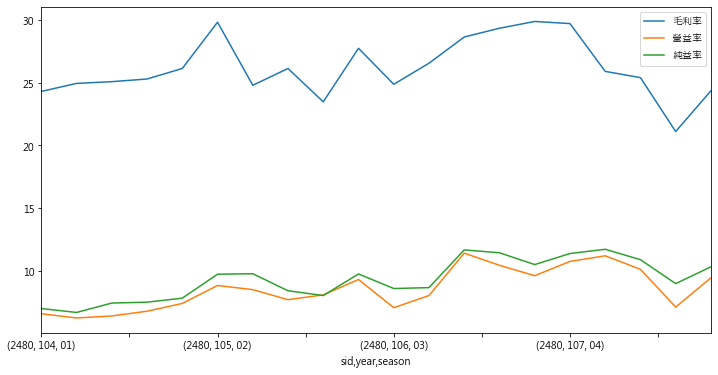

In [52]:
# 繪製財報三率圖

plt.rcParams['figure.figsize'] = (12, 6) 
df['毛利率'].plot()
df['營益率'].plot()
df['純益率'].plot()
plt.legend()

In [53]:
df = df.reset_index()
df.head(10)

,sid,year,season,不動產重估增值,不重分類至損益之其他項目,不重分類至損益之項目：,停業單位損益合計,停業單位淨利（淨損）,停業單位稅後損益,備供出售金融資產未實現評價損益,...,非控制權益（淨利∕損）,非控制權益（淨利／損）,非控制權益（綜合損益）,預期信用減損損失（利益）,營業毛利,營業利益,稅前純益,毛利率,營益率,純益率
0,2480,104,01,None,None,NaN,None,None,None,18473.0,...,NaN,0.0,0.0,NaN,258121.0,69901.0,74223.0,24.31,6.58,6.99
1,2480,104,02,None,None,NaN,None,None,None,3968.0,...,NaN,0.0,NaN,NaN,268544.0,67106.0,71868.0,24.95,6.24,6.68
2,2480,104,03,None,None,NaN,None,None,None,-32520.0,...,NaN,0.0,0.0,NaN,311458.0,79436.0,92261.0,25.09,6.40,7.43
3,2480,104,04,None,None,NaN,None,None,None,6024.0,...,NaN,0.0,0.0,NaN,1114157.0,298382.0,330060.0,25.30,6.78,7.50
4,2480,105,01,None,None,NaN,None,None,None,-9356.0,...,NaN,0.0,0.0,NaN,255133.0,72284.0,76297.0,26.14,7.40,7.82
5,2480,105,02,None,None,NaN,None,None,None,-11505.0,...,NaN,0.0,NaN,NaN,271427.0,80378.0,88483.0,29.83,8.83,9.73
6,2480,105,03,None,None,NaN,None,None,None,-24303.0,...,NaN,0.0,0.0,NaN,271652.0,93069.0,107070.0,24.80,8.50,9.77
7,2480,105,04,None,None,NaN,None,None,None,-44032.0,...,NaN,0.0,0.0,NaN,1103872.0,325296.0,355150.0,26.14,7.70,8.41
8,2480,106,01,None,None,NaN,None,None,None,12956.0,...,0.0,NaN,0.0,NaN,253531.0,87258.0,86668.0,23.48,8.08,8.03
9,2480,106,02,None,None,NaN,None,None,None,-524.0,...,0.0,NaN,NaN,NaN,264225.0,88659.0,92820.0,27.75,9.31,9.75


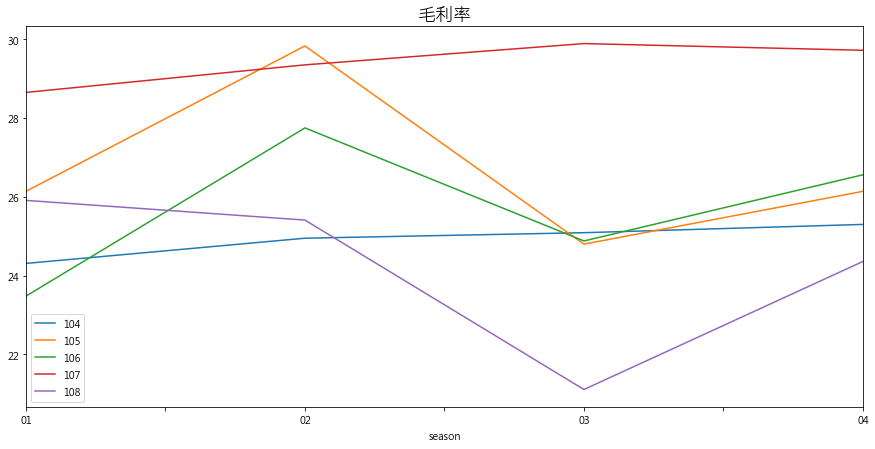

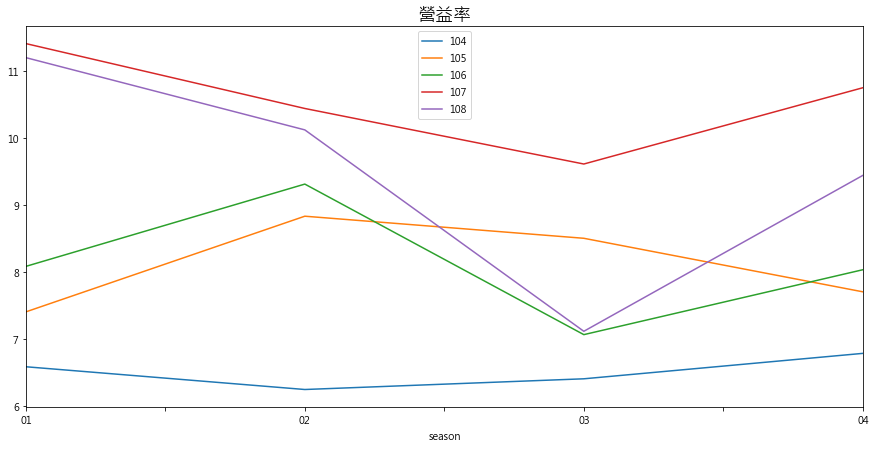

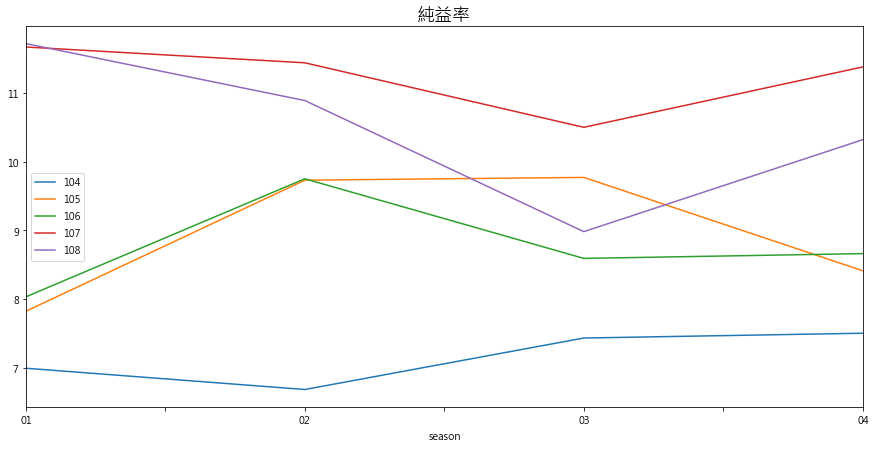

In [62]:
# 建立一個 figure 和一個 subplot
fig, ax = plt.subplots(figsize=(15,7))
df.groupby('year').plot(x='season', y='毛利率', ax=ax)
plt.title('毛利率', fontsize=18)
plt.legend(df.year.unique())

fig, ax = plt.subplots(figsize=(15,7))
df.groupby('year').plot(x='season', y='營益率', ax=ax)
plt.title('營益率', fontsize=18)
plt.legend(df.year.unique())

fig, ax = plt.subplots(figsize=(15,7))
df.groupby('year').plot(x='season', y='純益率', ax=ax)
plt.title('純益率', fontsize=18)
plt.legend(df.year.unique())

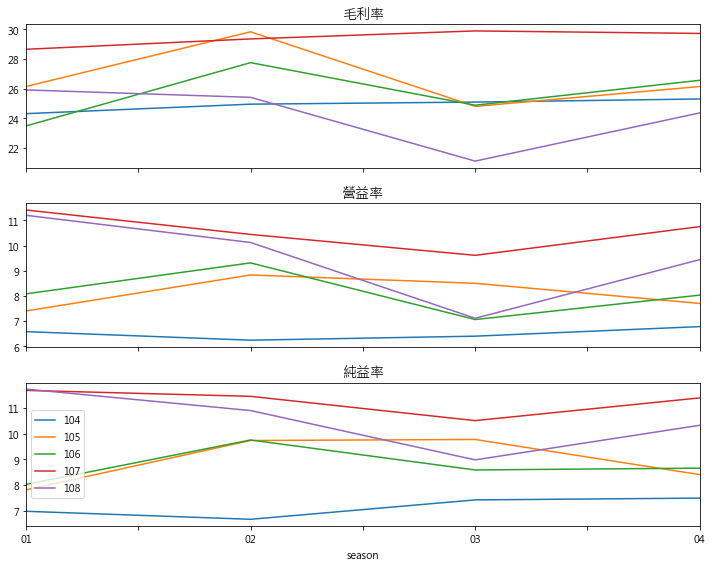

In [84]:
# 建立一個 figure 和 3 個 subplot

plt.rcParams['figure.figsize'] = (10, 8)
fig, axes = plt.subplots(nrows=3, sharex=True)
df.groupby('year').plot(x='season', y='毛利率', ax=axes[0], legend=None)
axes[0].set_title('毛利率', fontsize=14)
#axes[0].legend(df.year.unique())
df.groupby('year').plot(x='season', y='營益率', ax=axes[1], legend=None)
axes[1].set_title('營益率', fontsize=14)
#axes[1].legend(df.year.unique())
df.groupby('year').plot(x='season', y='純益率', ax=axes[2])
axes[2].set_title('純益率', fontsize=14)
axes[2].legend(df.year.unique())
plt.tight_layout()

# 本益比計算

本益比(Price-to-Earning ratio)：股價／EPS

In [85]:
conn1 = sqlite3.connect(os.path.join('data', 'data.db'))

In [86]:
# 讀取股價資料

sid = input('請輸入股票代碼：')

query = "select * from price where sid="+sid+" and date between datetime('2019-01-01') and datetime('2019-12-31')"
price = pd.read_sql(query, conn1, index_col='date')

price

請輸入股票代碼：2480


,sid,證券名稱,成交股數,成交筆數,成交金額,開盤價,最高價,最低價,收盤價,最後揭示買價,最後揭示買量,最後揭示賣價,最後揭示賣量
date,,,,,,,,,,,,,
2019-01-02 00:00:00,2480,敦陽科,336569,237,13186968,39.25,39.50,38.85,39.20,39.15,2,39.20,2
2019-01-03 00:00:00,2480,敦陽科,180163,143,7040969,38.90,39.25,38.90,39.20,39.20,3,39.25,4
2019-01-04 00:00:00,2480,敦陽科,239526,149,9371016,38.80,39.45,38.80,39.40,39.30,1,39.40,1
2019-01-07 00:00:00,2480,敦陽科,352741,202,14005490,39.80,39.85,39.45,39.80,39.70,1,39.80,28
2019-01-08 00:00:00,2480,敦陽科,114173,99,4547483,39.80,40.05,39.50,39.85,39.85,6,39.90,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-25 00:00:00,2480,敦陽科,144079,107,7782351,54.20,54.20,53.90,53.90,53.90,44,54.10,21
2019-12-26 00:00:00,2480,敦陽科,208321,125,11213100,53.90,53.90,53.70,53.70,53.70,22,53.90,4
2019-12-27 00:00:00,2480,敦陽科,184959,120,9948986,53.70,54.00,53.70,54.00,53.90,1,54.00,23


In [88]:
# 尋找全年最高價、最低價與平均價

print('全年最高價：', price['收盤價'].max())
print('全年最低價：', price['收盤價'].min())
print('全年平均價：', round(price['收盤價'].mean(),2))

全年最高價： 61.2
全年最低價： 39.2
全年平均價： 51.81


In [90]:
# 讀取 eps 資料

query = "select * from income where sid="+sid+" and year='108'"
eps = pd.read_sql(query, conn, index_col='season')

eps

,sid,year,不動產重估增值,不重分類至損益之其他項目,不重分類至損益之項目：,停業單位損益合計,停業單位淨利（淨損）,停業單位稅後損益,備供出售金融資產未實現評價損益,共同控制下前手權益（淨利∕損）,...,銷貨成本,銷貨折讓,銷貨收入,銷貨收入淨額,銷貨退回,除列按攤銷後成本衡量金融資產淨損益,非控制權益（淨利∕損）,非控制權益（淨利／損）,非控制權益（綜合損益）,預期信用減損損失（利益）
season,,,,,,,,,,,,,,,,,,,,,
01,2480,108,None,None,41919.0,None,None,None,None,None,...,None,None,None,1392630.0,None,None,0.0,None,0.0,-282.0
02,2480,108,None,None,20597.0,None,None,None,None,None,...,None,None,None,1201525.0,None,None,0.0,None,NaN,-6506.0
03,2480,108,None,None,39277.0,None,None,None,None,None,...,None,None,None,NaN,None,None,0.0,None,0.0,-464.0
04,2480,108,None,None,85635.0,None,None,None,None,None,...,None,None,None,5521432.0,None,None,0.0,None,0.0,-6998.0


In [92]:
# 計算全年 EPS

total = eps.loc['04']['基本每股盈餘']
# eps.基本每股盈餘
# total = eps.基本每股盈餘.sum()
total

7.24

In [93]:
# 計算本益比

print('最低本益比：', round(price['收盤價'].min()/total,2))
print('最高本益比：', round(price['收盤價'].max()/total,2))
print('平均本益比：', round(price['收盤價'].mean()/total,2))

最低本益比： 5.41
最高本益比： 8.45
平均本益比： 7.16


# 股價淨值比 - 資產負債表

* 股價淨值比(Price-Book Ratio)：股價 / 每股淨值
* 每股淨值 = 淨值 / 流通在外股數
* 流通在外股數 = 普通股股本 / 10
* 淨值 = 總資產 – 總負債 = 股東權益 (歸屬於母公司業主之權益合計)

In [94]:
# 讀取資產負債表資料
query = "select * from bs where sid="+sid+" and year='108'"
df = pd.read_sql(query, conn, index_col='season')
print(df)

# 讀取股價資料
query = "select * from price where sid="+sid+" and date between datetime('2019-12-20') and datetime('2019-12-31')"
price = pd.read_sql(query, conn1, index_col='date')
price

         sid year  不動產、廠房及設備 不動產重估增值 以成本衡量之金融負債－流動 以成本衡量之金融資產－非流動淨額    使用權資產  \
season                                                                         
01      2480  108   459250.0    None          None             None  54247.0   
02      2480  108   456179.0    None          None             None  50187.0   
03      2480  108   456062.0    None          None             None  47974.0   
04      2480  108   452727.0    None          None             None  45022.0   

           保留盈餘合計 備供出售金融資產未實現損益 備供出售金融資產－流動淨額  ... 避險之金融資產－非流動 避險工具之損益  重估增值  \
season                                         ...                             
01      1575640.0          None          None  ...        None    None  None   
02      1362546.0          None          None  ...        None    None  None   
03      1511980.0          None          None  ...        None    None  None   
04      1629691.0          None          None  ...        None    None  None   

        長期借款 非控制權益   非流動負債合計   非流動資產合計

,sid,證券名稱,成交股數,成交筆數,成交金額,開盤價,最高價,最低價,收盤價,最後揭示買價,最後揭示買量,最後揭示賣價,最後揭示賣量
date,,,,,,,,,,,,,
2019-12-20 00:00:00,2480,敦陽科,162202,122,8692247,53.4,53.9,53.3,53.8,53.7,7,53.8,16
2019-12-23 00:00:00,2480,敦陽科,170681,142,9200533,53.8,54.1,53.6,54.1,53.9,2,54.1,39
2019-12-24 00:00:00,2480,敦陽科,143921,121,7775234,54.3,54.3,53.9,54.1,54.0,5,54.2,29
2019-12-25 00:00:00,2480,敦陽科,144079,107,7782351,54.2,54.2,53.9,53.9,53.9,44,54.1,21
2019-12-26 00:00:00,2480,敦陽科,208321,125,11213100,53.9,53.9,53.7,53.7,53.7,22,53.9,4
2019-12-27 00:00:00,2480,敦陽科,184959,120,9948986,53.7,54.0,53.7,54.0,53.9,1,54.0,23
2019-12-30 00:00:00,2480,敦陽科,209527,144,11271296,54.1,54.1,53.7,53.7,53.7,8,53.9,10
2019-12-31 00:00:00,2480,敦陽科,132108,84,7094985,53.7,53.9,53.6,53.7,53.6,13,53.8,15


In [95]:
股本 = df['普通股股本']['04']
股東權益 = df['歸屬於母公司業主之權益合計']['04']
股價 = price.iloc[-1]['收盤價']
print('股本 =', 股本)
print('股東權益 =', 股東權益)
print('股價 =', 股價)

股本 = 1063603.0
股東權益 = 2797728.0
股價 = 53.7


In [96]:
# 計算股價淨值比

PB = round(股價 / (股東權益 / (股本 / 10)), 2)
print('股價淨值比 =', PB)

股價淨值比 = 2.04


# 找出某個特定欄位資料

合約負債：https://www.youtube.com/watch?v=VcQzpecU9q8

In [104]:
# 查詢合約負債資料

#query = "select sid, year, season, 合約負債－流動 from bs"
query = "select sid, year, season, 合約負債－流動 from bs where 合約負債－流動 > 0"
df = pd.read_sql(query, conn, index_col=['sid', 'year','season'])

df

合約負債－流動
sid  year season          
2376 108  04      247156.0
          03      663898.0
          02      637445.0
          01      430530.0
     107  04      335964.0
...                    ...
1723 107  04       69817.0
     108  01       20432.0
          02       25723.0
          03       63032.0
          04       12872.0

[169 rows x 1 columns]